# Laboratory 5: Convolutional Neural Networks

In this laboratory session we will train some CNNs to recognize color images in the [CIFAR-10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

## Part 1: Initial Setup and Data Exploration

We begin with some standard imports, as usual.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Standard Pytorch imports (note the aliases).
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.cuda.is_available()

True

Cuda is actually aveavailable on my pc so i will push some extra epochs.

### Exercise 1.1: Dataset and Dataloader Preparation

The `torchvision` library provides a class (with the same interface as MNIST) for the CIFAR-10 dataset. As with MNIST, it will automatically download and prepare the dataset for use. Use the CIFAR10 class to load the training, validation (use 2000 images), and test splits.

**Note**: Don't forget to *transform* the images in the datasets to convert them to tensors and standardize them!

**Hint**: Feel free to copy-and-paste liberally from the notebook I published for the capsule lecture. **BUT**, make sure you know what you are doing, and be aware that *some* of the code will have to be adapted for use with the CIFAR10 dataset.

### Lab Notes
+ Mention to use smaller training set to speed up
+ Mention to use Colab with GPU
+ Mention ToTensor() transformation versus standardization

Files already downloaded and verified
Files already downloaded and verified
Dataset element:
(tensor([[[-1.0527e+00, -1.3068e+00, -1.1956e+00,  ...,  5.1906e-01,
           4.2380e-01,  3.6029e-01],
         [-1.7354e+00, -1.9895e+00, -1.7037e+00,  ..., -3.6628e-02,
          -1.0013e-01, -5.2505e-02],
         [-1.5926e+00, -1.7354e+00, -1.2115e+00,  ..., -1.1601e-01,
          -8.4258e-02, -2.5890e-01],
         ...,
         [ 1.3129e+00,  1.2018e+00,  1.1541e+00,  ...,  5.5081e-01,
          -1.1004e+00, -1.1480e+00],
         [ 8.6835e-01,  7.5721e-01,  9.6361e-01,  ...,  9.3186e-01,
          -4.4942e-01, -6.7170e-01],
         [ 8.2072e-01,  6.7783e-01,  8.5247e-01,  ...,  1.4399e+00,
           4.0792e-01, -3.6628e-02]],

        [[-9.8178e-01, -1.2395e+00, -1.2072e+00,  ...,  1.4557e-01,
           3.2838e-02,  1.6733e-02],
         [-1.6582e+00, -1.9803e+00, -1.8514e+00,  ..., -5.6305e-01,
          -6.4357e-01, -5.7915e-01],
         [-1.5938e+00, -1.8676e+00, -1.5455e+00,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mean pixel values: tensor([-1.2237e-06, -1.7075e-04,  1.1820e-04]), Standard deviation of pixel values: tensor([1.0001, 0.9999, 1.0000])


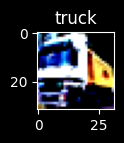

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

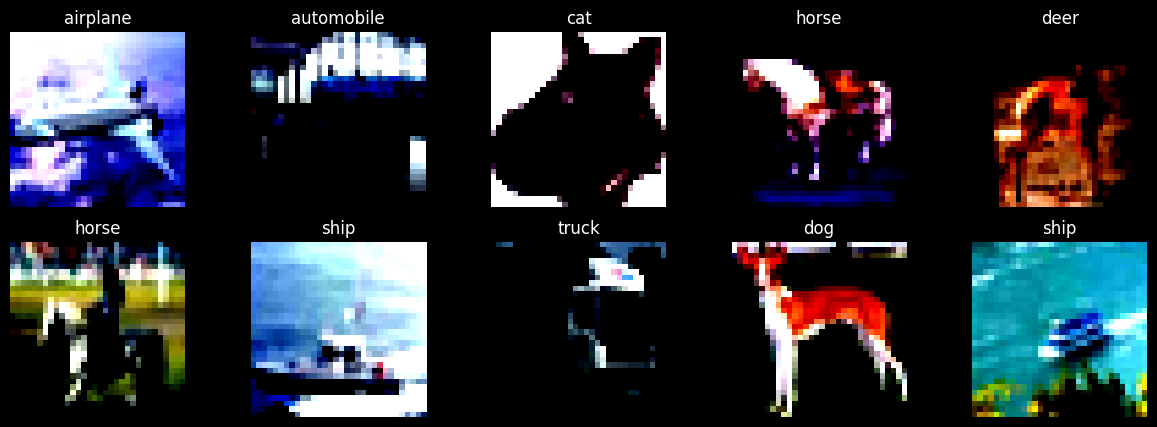

In [2]:
import random
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms

# Set validation set size
val_size = 2000

# Define transformation pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])
])

# Load CIFAR-10 datasets
ds_train = CIFAR10('./data', train=True, download=True, transform=transform)
ds_test = CIFAR10('./data', train=False, download=True, transform=transform)

# Print an example element from the training dataset
print(f'Dataset element:\n{ds_train[0]}')

# Print the data type of the stored images in the training dataset
print(f'ds_train.data dtype: {ds_train.data.dtype}')

# Extract and analyze pixel statistics for normalization
foo = ds_train[0][0]
data = torch.stack([d[0] for d in ds_train])
foo = data.permute(0, 2, 3, 1)
meanpix = foo.flatten(0, 2).mean(0)
stdpix = foo.flatten(0, 2).std(0)
print(
    f'Mean pixel values: {meanpix}, Standard deviation of pixel values: {stdpix}')

# Display a sample image from the training dataset
plt.figure(figsize=(1, 1))
plt.title(ds_train.classes[ds_train[1][1]])
image = ds_train[1][0].numpy().transpose((1, 2, 0))
plt.imshow(image)
plt.show()

# Display a random selection of images from the training dataset
num_images_to_display = 10
random_indices = random.sample(range(len(ds_train)), num_images_to_display)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.title(ds_train.classes[ds_train[idx][1]])
    image = ds_train[idx][0].numpy().transpose((1, 2, 0))
    plt.imshow(image)
    plt.axis('off')

plt.show()

To avoid very long computational time we reduce the dataset size and we print some examples from the dataset.

### Exercise 1.2: Dataloaders
Set up dataloaders for **all** of the datasets -- even though the validation set is small! Test out the datasets defined above and the dataloaders to make sure you understand the dataset format. Visualize some of the images to get a feel for the type of images and classes in CIFAR-10.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of batches in the training DataLoader: 88


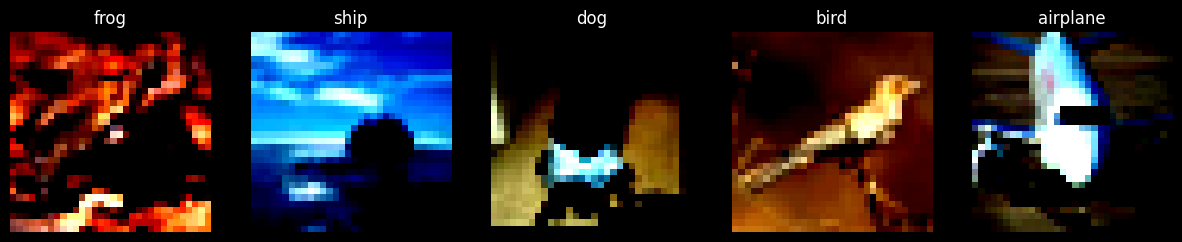

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


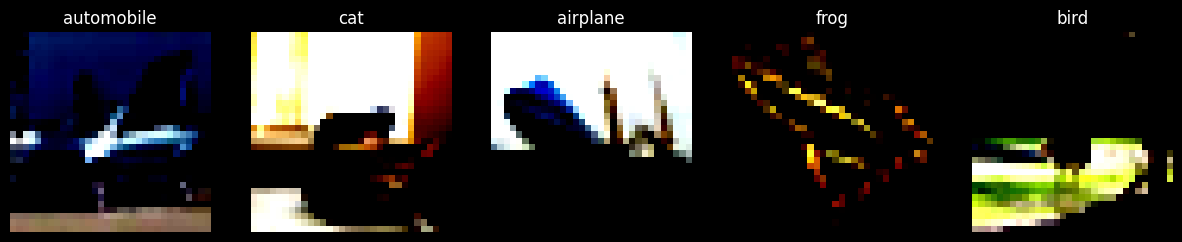

In [3]:
from torch.utils.data import Subset, DataLoader
import numpy as np

# Define the sizes for the training and validation subsets.
train_size = 45000
val_size = 5000

# Create subsets for training and validation.
# Use numpy to generate a random permutation of indices for the training dataset.
I = np.random.permutation(len(ds_train))

# Create a subset of the training dataset with the specified size.
ds_train_small = Subset(ds_train, I[:train_size])

# Create a subset of the training dataset for validation with the specified size.
ds_val = Subset(ds_train, I[train_size:train_size + val_size])

# Setup DataLoaders for all three datasets. Use the largest batch size possible.
batch_size = 512

# Create a DataLoader for the training subset.
# Shuffle the data during training by setting shuffle=True.
# Use multiple workers for faster data loading.
dl_train = DataLoader(ds_train_small, batch_size=batch_size, shuffle=True)

# Create a DataLoader for the validation subset.
# No need to shuffle the validation data.
# Use multiple workers for faster data loading.
dl_val = DataLoader(ds_val, batch_size=batch_size)

# Create a DataLoader for the testing dataset.
# No need to shuffle the test data.
# Use multiple workers for faster data loading.
dl_test = DataLoader(ds_test, batch_size=batch_size)

# Print the number of batches in the training DataLoader.
print(f'Number of batches in the training DataLoader: {len(dl_train)}')


def visualize_images(dataset, num_images=5):
    """
    Visualize random images from a dataset.

    Args:
    - dataset: The dataset to visualize images from.
    - num_images: The number of images to display.
    """
    random_indices = random.sample(range(len(dataset)), num_images)
    plt.figure(figsize=(15, 5))

    for i, idx in enumerate(random_indices, 1):
        plt.subplot(1, num_images, i)
        plt.title(dataset.classes[dataset[idx][1]])
        image = dataset[idx][0].numpy().transpose((1, 2, 0))
        plt.imshow(image)
        plt.axis('off')

    plt.show()
    
visualize_images(ds_train)
visualize_images(ds_test)


Training and validation subsets are created using a random permutation of indices and DataLoaders are set up for training, validation, and testing datasets with specified batch size and number of workers.

Random images from each dataset are visualized to get a feel for the type of images and classes in CIFAR-10.

**COOL:** during the next trining i notice that the execution time were super slow. After a check i discovered that the num_workers in the dataloader is set to 0 by default and i, being dumb, decided to set it to 10. 0 is way faster.

## Part 2: Establishing a stable baseline

In this part of the laboratory we will establish a simple baseline as a starting point.

### Exercise 2.1: An MLP Baseline

Define a simple Multilayer Perceptron to classify the CIFAR-10 images. Define it as a class inheriting from torch.nn.Module. Don't make it too complex or too deep. We're just looking for a starting point. A *baseline*.

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class MLP(nn.Module):
    def __init__(self, inner=128):
        super(MLP, self).__init__()
        # Define the layers of the MLP
        self.fc1 = nn.Linear(32*32*3, inner)
        self.fc2 = nn.Linear(inner, inner)
        self.out = nn.Linear(inner, 10)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)

        # Feedforward pass through the layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        # Apply log softmax for classification
        x = F.log_softmax(x, dim=1)
        return x


# Create an instance of the MLP model
model_mlp = MLP()

This code defines an MLP class with two hidden layers and uses the ReLU activation function. The input size is determined by the shape of CIFAR-10 images (32x32x3), and the output layer has 10 units for the 10 classes in CIFAR-10. The forward method specifies the forward pass through the layers, and log softmax is applied for classification. The model_mlp instance is created as a baseline model.

### Exercise 2.2: Train and Evaluate your MLP Baseline

Train the model for a few (say, 20) epochs. Again, feel free to use my training code from the Capsule Lecture (or roll your own, mine is very basic). Make sure you plot training curves and report accuracy on the test set.

Training epoch 19: 100%|██████████| 88/88 [00:09<00:00,  9.18it/s]


Accuracy report on TEST
:               precision    recall  f1-score   support

           0      0.570     0.497     0.531      1000
           1      0.613     0.557     0.584      1000
           2      0.332     0.373     0.352      1000
           3      0.230     0.089     0.128      1000
           4      0.355     0.258     0.299      1000
           5      0.318     0.528     0.397      1000
           6      0.486     0.655     0.558      1000
           7      0.748     0.382     0.506      1000
           8      0.537     0.687     0.603      1000
           9      0.536     0.635     0.582      1000

    accuracy                          0.466     10000
   macro avg      0.472     0.466     0.454     10000
weighted avg      0.472     0.466     0.454     10000



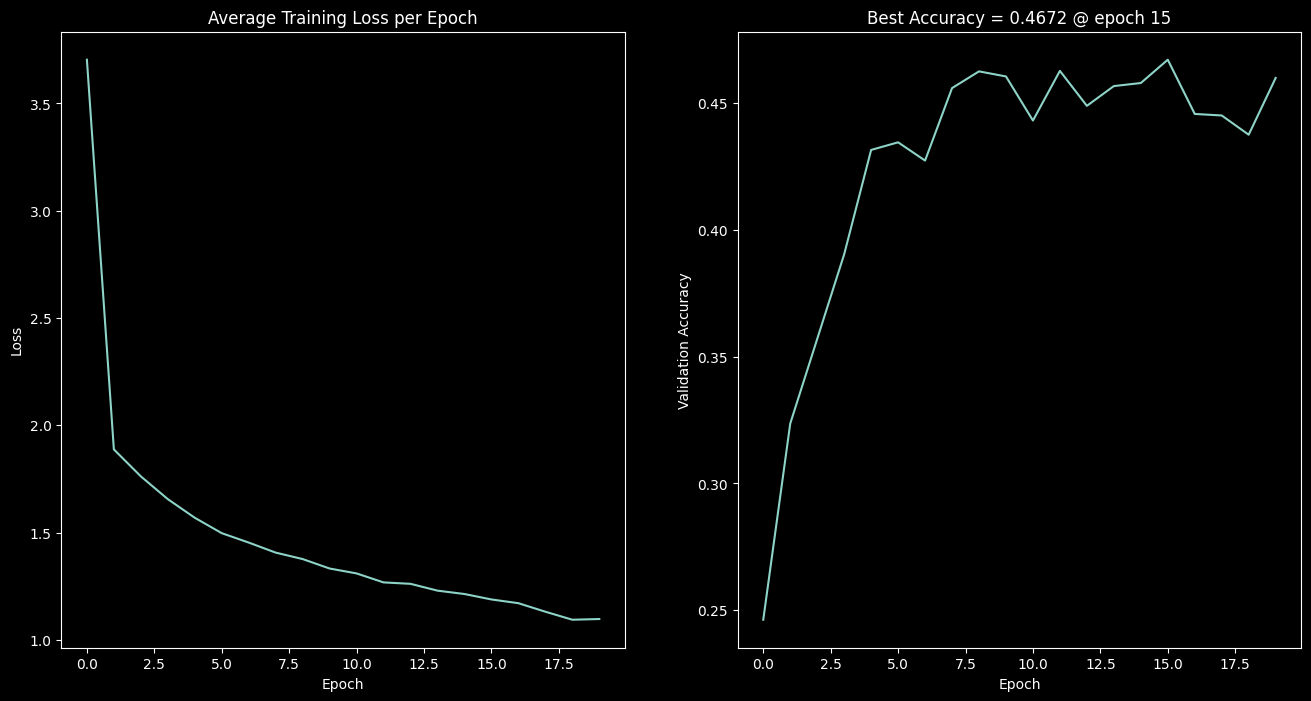

In [5]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Function to train a model for a single epoch over the data loader.

def train_epoch(model, dl, opt, epoch='Unknown', device='cpu'):
    model.train()
    losses = []
    for (xs, ys) in tqdm(dl, desc=f'Training epoch {epoch}', leave=True):
        xs = xs.to(device)
        ys = ys.to(device)
        opt.zero_grad()
        logits = model(xs)
        loss = F.cross_entropy(logits, ys)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return np.mean(losses)

# Function to evaluate model over all samples in the data loader.


def evaluate_model(model, dl, device='cpu'):
    model.eval()
    predictions = []
    gts = []
    for (xs, ys) in tqdm(dl, desc='Evaluating', leave=False):
        xs = xs.to(device)
        preds = torch.argmax(model(xs), dim=1)
        gts.append(ys)
        predictions.append(preds.detach().cpu().numpy())

    # Return accuracy score and classification report.
    return (accuracy_score(np.hstack(gts), np.hstack(predictions)),
            classification_report(np.hstack(gts), np.hstack(predictions), zero_division=0, digits=3))

# Simple function to plot the loss curve and validation accuracy.
def plot_validation_curves(losses_and_accs):
    losses = [x for (x, _) in losses_and_accs]
    accs = [x for (_, x) in losses_and_accs]
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Average Training Loss per Epoch')
    plt.subplot(1, 2, 2)
    plt.plot(accs)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Best Accuracy = {np.max(accs)} @ epoch {np.argmax(accs)}')

# Simple function to count the parameters in a model.
def count_parameters(model):
    return np.sum([p.numel() for p in model.parameters()])

# Training hyperparameters.
device = 'cuda'
lr = 0.01
epochs = 20

# Instantiate our model and optimizer.
model_mlp = MLP(512).to(device)
optimizer = torch.optim.Adam(model_mlp.parameters(), lr=lr)

# Training loop
losses_and_accs = []
for epoch in range(epochs):
    loss = train_epoch(model_mlp, dl_train, optimizer, epoch, device=device)
    (val_acc, _) = evaluate_model(model_mlp, dl_val, device=device)
    losses_and_accs.append((loss, val_acc))

# And finally plot the curves.
plot_validation_curves(losses_and_accs)
print(
    f'Accuracy report on TEST\n: {evaluate_model(model_mlp, dl_test, device=device)[1]}')

Not a good accuracy score, but we'll use this as a baseline for the next exercise.

Anyway we can observe a lack of consistent accuracy increment with more epochs with the learning rate 0.001. after various try i found a good learning rate at 0.01

## Part 3: A CNN for CIFAR-10 Classification

OK, we have a (simple) MLP baseline for comparison. Let's implement a simple CNN to classify CIFAR-10 images and see if we can beat the MLP.

### Exercise 3.1: Defining the CNN

Define a simple CNN model with a few convolutional and maxppooling layers -- not too many, since CIFAR-10 images are only 32x32 pixels! Use two fully-connected layers after the last convolution and before the logit outputs. Test out the model by passing a *single* image through it to make sure it's working.

In [6]:
class CNN(nn.Module):
    def __init__(self, channels=32, fc_width=128):
        super().__init__()
        self.conv1_1 = nn.Conv2d(3, channels, 3)
        self.conv1_2 = nn.Conv2d(channels, channels, 3)
        self.conv2_1 = nn.Conv2d(channels, channels, 3)
        self.conv2_2 = nn.Conv2d(channels, channels, 3)
        self.fc1 = nn.Linear(5*5*channels, fc_width)
        self.fc2 = nn.Linear(fc_width, fc_width)
        self.out = nn.Linear(fc_width, 10)
    
    def forward(self, x):
        x = self.extract(x)
        x = F.log_softmax(self.out(x), -1)
        return x
    
    def extract(self, x):
        x = F.relu(self.conv1_2(F.relu(self.conv1_1(x))))
        x = F.max_pool2d(x, 2) # 16x16
        x = F.relu(self.conv2_2(F.relu(self.conv2_1(x))))
        x = F.max_pool2d(x, 2) # 8x8
        x = x.view(len(x), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x
    

model_cnn = CNN(64)
batch = torch.stack([d[0] for d in ds_val][:16])
model_cnn(batch)

tensor([[-2.2738, -2.3356, -2.2784, -2.3685, -2.3445, -2.2188, -2.3080, -2.2400,
         -2.3335, -2.3357],
        [-2.2730, -2.3362, -2.2763, -2.3692, -2.3447, -2.2175, -2.3110, -2.2405,
         -2.3329, -2.3356],
        [-2.2729, -2.3361, -2.2770, -2.3678, -2.3454, -2.2196, -2.3112, -2.2395,
         -2.3307, -2.3366],
        [-2.2725, -2.3375, -2.2770, -2.3698, -2.3430, -2.2169, -2.3104, -2.2398,
         -2.3331, -2.3371],
        [-2.2700, -2.3395, -2.2776, -2.3719, -2.3426, -2.2169, -2.3113, -2.2399,
         -2.3312, -2.3363],
        [-2.2740, -2.3373, -2.2790, -2.3718, -2.3430, -2.2128, -2.3128, -2.2406,
         -2.3301, -2.3360],
        [-2.2730, -2.3359, -2.2753, -2.3714, -2.3469, -2.2190, -2.3087, -2.2381,
         -2.3313, -2.3377],
        [-2.2722, -2.3370, -2.2764, -2.3686, -2.3448, -2.2196, -2.3103, -2.2396,
         -2.3325, -2.3358],
        [-2.2709, -2.3375, -2.2812, -2.3686, -2.3420, -2.2178, -2.3129, -2.2387,
         -2.3316, -2.3356],
        [-2.2741, -

The CNN class is defined as a subclass of nn.Module, representing the CNN model.
The __init__ method sets up the layers of the model, including convolutional layers (conv1_1, conv1_2, conv2_1, conv2_2), fully-connected layers (fc1, fc2), and the output layer (out).
The forward method defines the forward pass of the model, applying the specified operations to input x and returning the log-softmax output.
The extract method is a helper function for feature extraction, applying convolutional and max-pooling operations.
An instance of the CNN model (model_cnn) is created with 64 channels.
A batch of 16 images from the validation dataset is stacked and passed through the model to check if it's working.

### Exercise 3.2: Training and Evaluating your CNN

Train the CNN using similar hyperparameters to what you used for the MLP above (epochs, learning rate). Evaluate the model in the same way as before.

Training epoch 19: 100%|██████████| 88/88 [00:11<00:00,  7.40it/s]


Accuracy report on TEST
:               precision    recall  f1-score   support

           0      0.000     0.000     0.000      1000
           1      0.000     0.000     0.000      1000
           2      0.000     0.000     0.000      1000
           3      0.000     0.000     0.000      1000
           4      0.000     0.000     0.000      1000
           5      0.100     1.000     0.182      1000
           6      0.000     0.000     0.000      1000
           7      0.000     0.000     0.000      1000
           8      0.000     0.000     0.000      1000
           9      0.000     0.000     0.000      1000

    accuracy                          0.100     10000
   macro avg      0.010     0.100     0.018     10000
weighted avg      0.010     0.100     0.018     10000



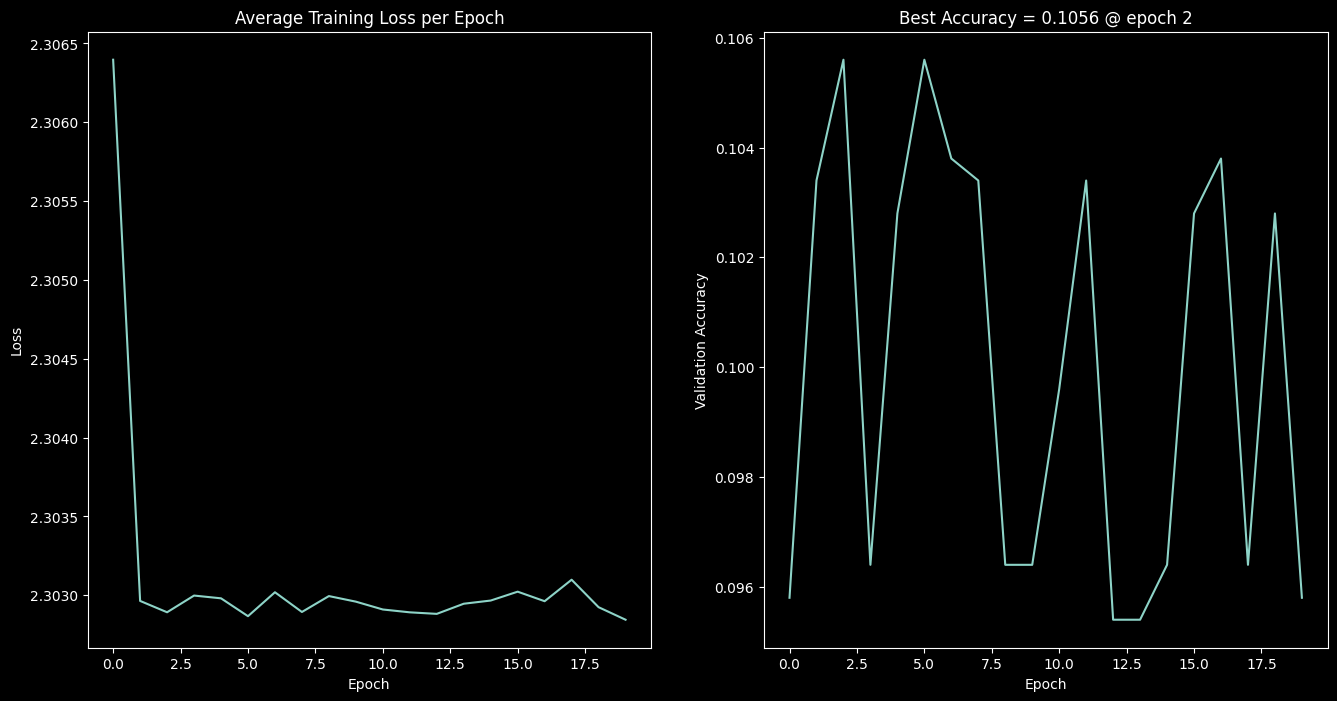

In [7]:
# Training hyperparameters.
device = 'cuda'
lr = 0.01
epochs = 20

# Instantiate our model and optimizer.
model_mlp = None
model_cnn = CNN(32).to(device)
optimizer = torch.optim.Adam(model_cnn.parameters(), lr=lr)

# Training loop
losses_and_accs = []
for epoch in range(epochs):
    loss = train_epoch(model_cnn, dl_train, optimizer, epoch, device=device)
    (val_acc, _) = evaluate_model(model_cnn, dl_val, device=device)
    losses_and_accs.append((loss, val_acc))
    
# And finally plot the curves.
plot_validation_curves(losses_and_accs)
print(f'Accuracy report on TEST\n: {evaluate_model(model_cnn, dl_test, device=device)[1]}')

As we can see the accuracy is way higher than the baseline! Also we can see in this case the congruence with the increasing accuracy with more epochs.

## Going Forward

In practice we usually don't train deep models from *scratch*. Especially if we don't have a lot of annotated data we almost always use a **pre-trained** model either as a **feature extractor** or to **fine-tune** on our problem. The Torchvision library supports access to a [huge variety or pre-trained models](https://pytorch.org/vision/stable/models/resnet.html) that you can use for *exactly* this purpose. Keep this in mind if you have an image recognition problem -- you can use a pre-trained model as a **feature extractor** and then train a *simple* MLP to solve your classification problem. This works *very* well in practice.

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Accuracy on the test set: 0.1


tensor([[0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023],
        [0.0976, 0.0978, 0.0985, 0.1006, 0.0997, 0.1052, 0.0992, 0.0995, 0.0994,
         0.1023]], grad_fn=<

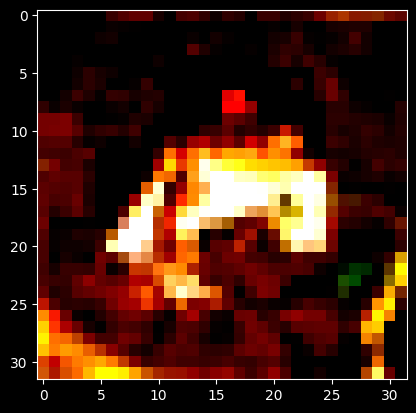

In [8]:
from sklearn.svm import LinearSVC

# Extract features from the training set using the CNN model
X_tr = model_cnn.to('cpu').extract(
    torch.stack([d[0] for d in ds_train]).to('cpu'))
X_tr = X_tr.detach().numpy()
labels = np.array([d[1] for d in ds_train])

# Train a Linear Support Vector Classifier (LinearSVC) on the training features and labels
svc = LinearSVC().fit(X_tr, labels)

# Extract features from the test set using the CNN model
X_te = model_cnn.to('cpu').extract(torch.stack(
    [d[0] for d in ds_test]).to('cpu')).detach().numpy()
test_labels = np.array([d[1] for d in ds_test])

# Evaluate the trained LinearSVC on the test set and calculate accuracy
accuracy = np.mean(svc.predict(X_te) == test_labels)
print(f'Accuracy on the test set: {accuracy}')

# Display an image from the test set
plt.imshow(data[0].permute(1, 2, 0))

# Get predictions for the first 10 examples in the test set using the CNN model
torch.exp(model_cnn(data[0:10]))


In summary, this code demonstrates the process of extracting features from images using a pre-trained CNN, training a Linear Support Vector Classifier, evaluating its accuracy on a test set, displaying an image, and obtaining predictions for a subset of examples. The LinearSVC is used as a simple classifier on top of the features extracted by the CNN.

C:\Users\leona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.1


Training epoch 24: 100%|██████████| 98/98 [00:02<00:00, 35.01it/s]


Accuracy report on TEST
:               precision    recall  f1-score   support

           0      0.000     0.000     0.000      1000
           1      0.000     0.000     0.000      1000
           2      0.000     0.000     0.000      1000
           3      0.000     0.000     0.000      1000
           4      0.000     0.000     0.000      1000
           5      0.000     0.000     0.000      1000
           6      0.000     0.000     0.000      1000
           7      0.100     1.000     0.182      1000
           8      0.000     0.000     0.000      1000
           9      0.000     0.000     0.000      1000

    accuracy                          0.100     10000
   macro avg      0.010     0.100     0.018     10000
weighted avg      0.010     0.100     0.018     10000



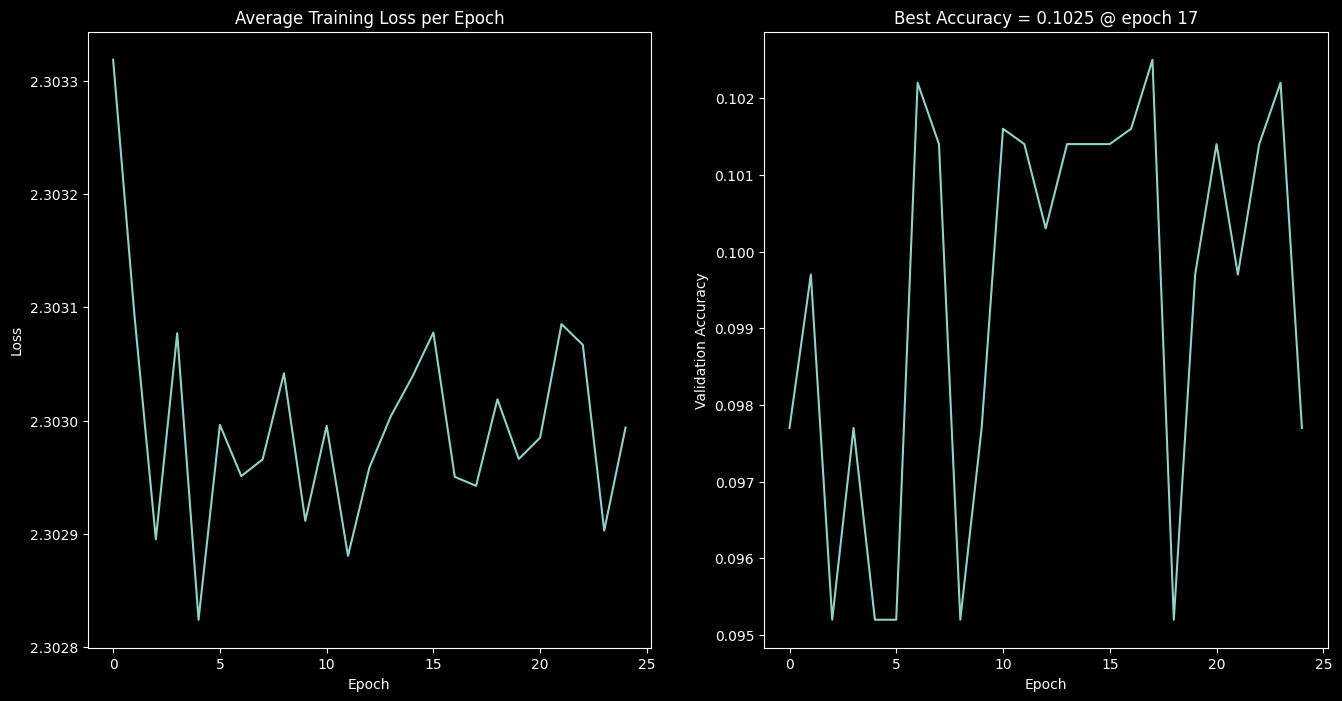

In [9]:
from torch.utils.data import TensorDataset
from sklearn.svm import LinearSVC
X_tr = model_cnn.to('cpu').extract(torch.stack([d[0] for d in ds_train]).to('cpu'))
X_tr = X_tr.detach().numpy()
labels = np.array([d[1] for d in ds_train])
svc = LinearSVC().fit(X_tr, labels)
X_te = model_cnn.to('cpu').extract(torch.stack([d[0] for d in ds_test]).to('cpu')).detach().numpy()
test_labels = np.array([d[1] for d in ds_test])
print(np.mean(svc.predict(X_te) == test_labels))

y_tr = torch.tensor([d[1] for d in ds_train], dtype=torch.long)
y_te = torch.tensor([d[1] for d in ds_test], dtype=torch.long)
dataset_train = TensorDataset(torch.from_numpy(X_tr), y_tr)
dataset_test = TensorDataset(torch.from_numpy(X_te), y_te)
val_size = int(0.2 * len(dataset_train))
train_subset, val_subset = Subset(dataset_train, range(len(dataset_train) - val_size)), Subset(
    dataset_train, range(len(dataset_train) - val_size, len(dataset_train)))
dl_train = DataLoader(dataset_train, batch_size=batch_size,
                      shuffle=True, num_workers=2)
dl_val = DataLoader(val_subset, batch_size=batch_size,
                    shuffle=False, num_workers=2)
dl_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, num_workers=2)


class simpleMLP(nn.Module):
    def __init__(self, input_size, inner=128):
        super().__init__()
        self.fc1 = nn.Linear(input_size, inner)
        self.out = nn.Linear(inner, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.out(x)
        x = F.log_softmax(x, -1)
        return x
    

# Training hyperparameters.
device = 'cuda'
lr = 0.01
epochs = 25

# Instantiate our model and optimizer.
input_size = X_tr.shape[1]
model_smlp = simpleMLP(input_size).to(device)
optimizer = torch.optim.Adam(model_smlp.parameters(), lr=lr)

# Training loop
losses_and_accs = []
for epoch in range(epochs):
    loss = train_epoch(model_smlp, dl_train, optimizer, epoch, device=device)
    (val_acc, _) = evaluate_model(model_smlp, dl_val, device=device)
    losses_and_accs.append((loss, val_acc))

# And finally plot the curves.
plot_validation_curves(losses_and_accs)
print(
    f'Accuracy report on TEST\n: {evaluate_model(model_smlp, dl_test, device=device)[1]}')